In [1]:
from tobler.nlcd import *

In [4]:
%matplotlib inline
import rasterio
from rasterio.plot import show

#from osnap.data import read_ltdb

import pandas as pd
import pickle

import geopandas as gpd

import statsmodels.formula.api as smf
from statsmodels.genmod.families import Poisson

import numpy as np

import time

In [ ]:
# Downloaded from https://www.dropbox.com/s/n8ws97z2pogta7z/nlcd_2011_edition_2014.tif?dl=0
filepath = 'D:\\nlcd_2011_edition_2014.tif'

In [7]:
%%time
us_raster = rasterio.open(filepath)
show(us_raster, cmap='terrain')

RasterioIOError: This is a BigTIFF file.  BigTIFF is not supported by this version of GDAL and libtiff.

In [8]:
filepath = '~/std_2010_fullcount.csv'
# filepath = 'C:/Users/renan/Desktop/full_count_2010/std_2010_fullcount.csv'

census_2010 = pd.read_csv(filepath, encoding = "ISO-8859-1", sep = ",")

# This file can be download here: https://drive.google.com/open?id=1gWF0OCn6xuR_WrEj7Ot2jY6KI2t6taIm
with open('../files/tracts_US.pkl', 'rb') as input:
    map_gpd = pickle.load(input)

#df = census_2010.loc[(census_2010.state == "PA")]
df = census_2010.copy()

map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
merged_gdf = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
merged_gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,COUNTY_ID,county_id2,COUNTYNS10,NAME10_COU,GEOID_MSA,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
0,01,001,020801,01001020801,208.01,01001,1001,161526,Autauga,33860,...,16,3,16,4,3,25,5,4,bw,White Black
1,01,001,020802,01001020802,208.02,01001,1001,161526,Autauga,33860,...,57,11,67,19,5,47,6,10,bw,White Black
2,01,001,020200,01001020200,202,01001,1001,161526,Autauga,33860,...,14,1,5,0,0,5,3,1,bw,White Black
3,01,001,020700,01001020700,207,01001,1001,161526,Autauga,33860,...,31,8,14,1,3,7,0,1,bw,White Black
4,01,001,020600,01001020600,206,01001,1001,161526,Autauga,33860,...,61,9,6,0,0,10,2,0,bw,White Black


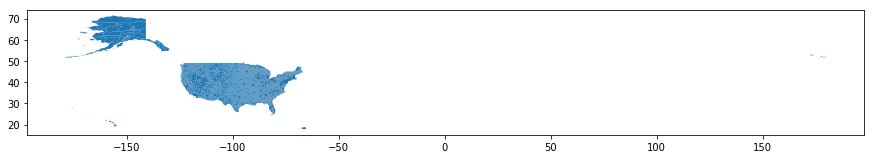

In [17]:
merged_gdf.plot(figsize = (15, 15))

In [10]:
weights = return_weights_from_regression(merged_gdf, us_raster, 'pop10')
weights

NameError: name 'us_raster' is not defined

In [11]:
t0 = time.time()
correspondence_table = create_non_zero_population_by_pixels_locations(merged_gdf, us_raster, 'pop10', weights)
t1 = time.time()

NameError: name 'us_raster' is not defined

In [12]:
# You have to install quilt: pip install quilt
# Also, you have to run: quilt install spatialucr/census

import geopandas as gpd
from quilt.data.spatialucr import census
from shapely.wkb import loads

df = census.tracts_1990()
df['geometry'] = df.wkb.apply(lambda x: loads(x, hex=True))
df_1990 = gpd.GeoDataFrame(df)

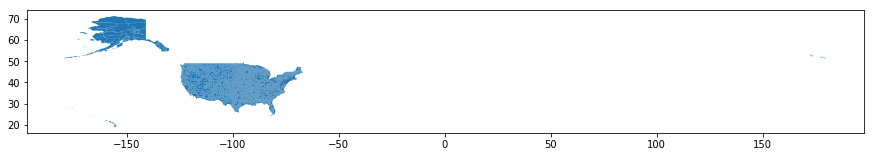

In [16]:
df_1990.plot(figsize = (15, 15))

In [14]:
len(merged_gdf)

74002

In [15]:
len(df_1990)

61332

In [18]:
t0 = time.time()
interpolated_pa = calculate_interpolated_population_from_correspondence_NLCD_table(df_1990, us_raster, correspondence_table)
t1 = time.time()

NameError: name 'us_raster' is not defined

In [19]:
print('Total Time to interpolate the population with new tracts (in minutes): {}'.format((t1 - t0)/60))

NameError: name 't1' is not defined